In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
prices = np.genfromtxt("prices.txt", delimiter="   ").T

In [60]:
n_inst, n_days = prices.shape

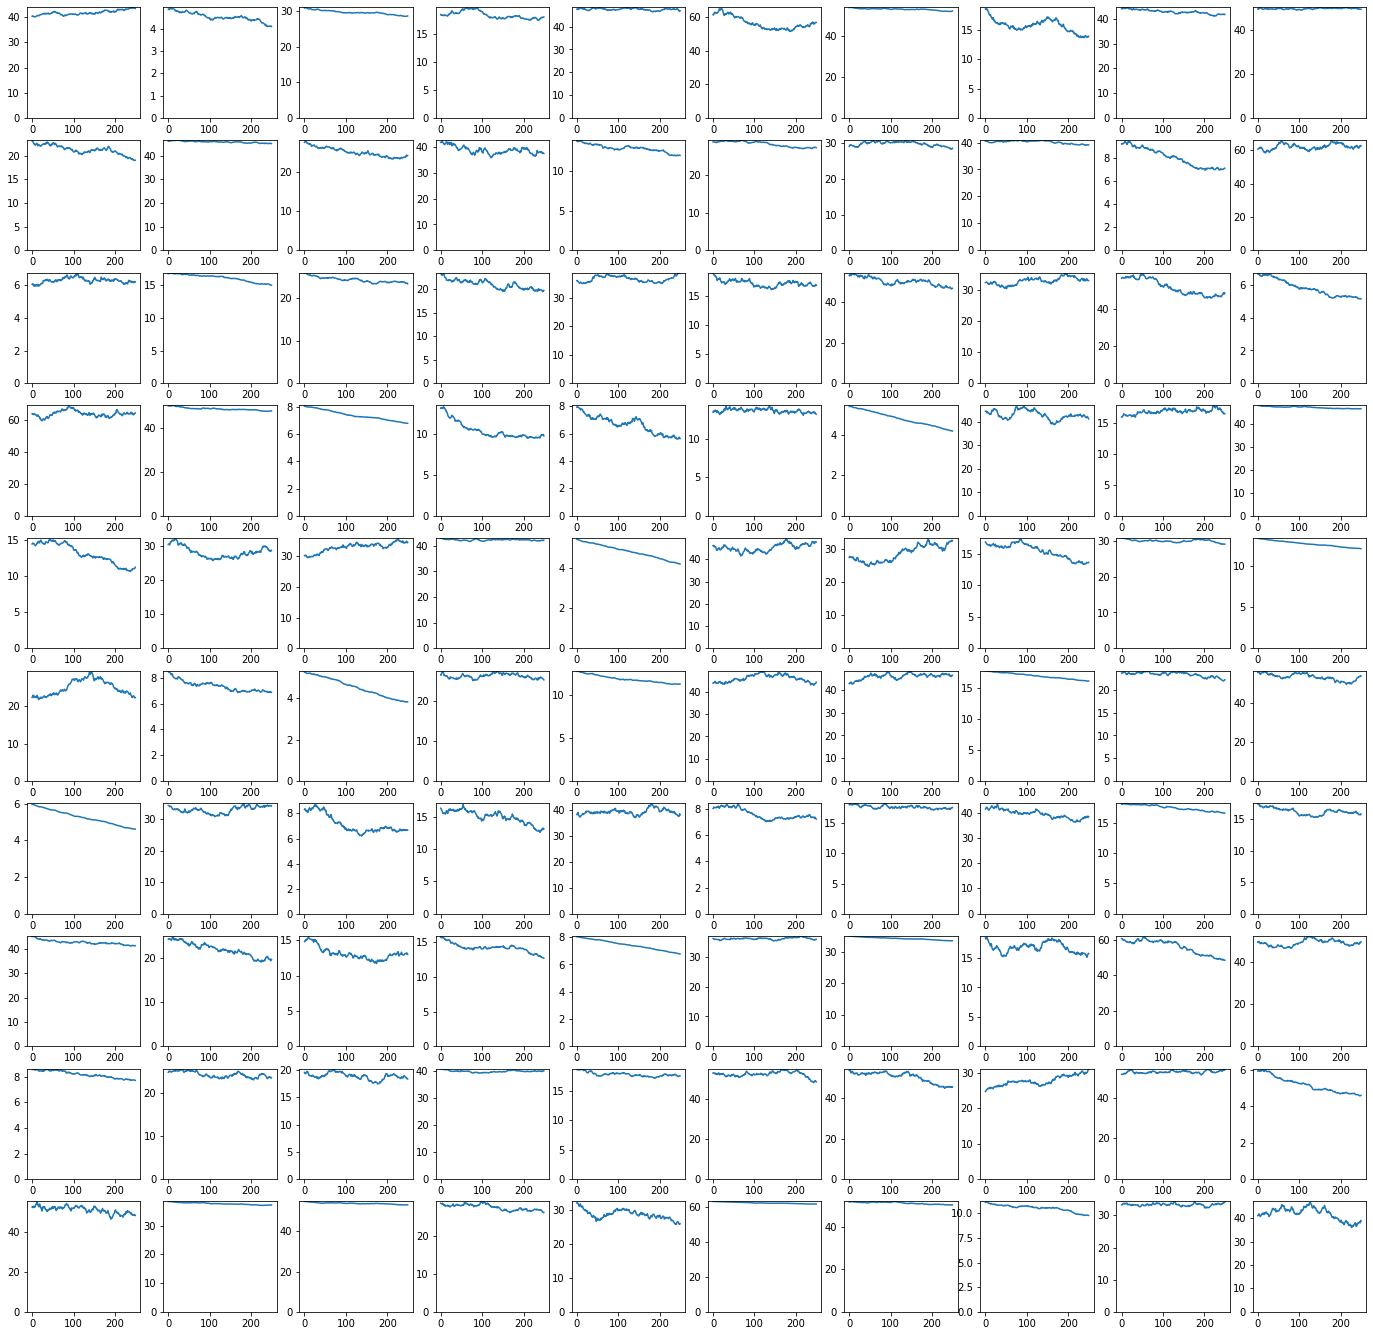

In [61]:
fig, axes = plt.subplots(10, 10, figsize=(24, 24))
for i in range(0, n_inst):
    ax = axes.ravel()[i]
    ax.plot(prices[i])
    ax.set_ylim(bottom=0)
plt.show()

fig.savefig("stocks.png")



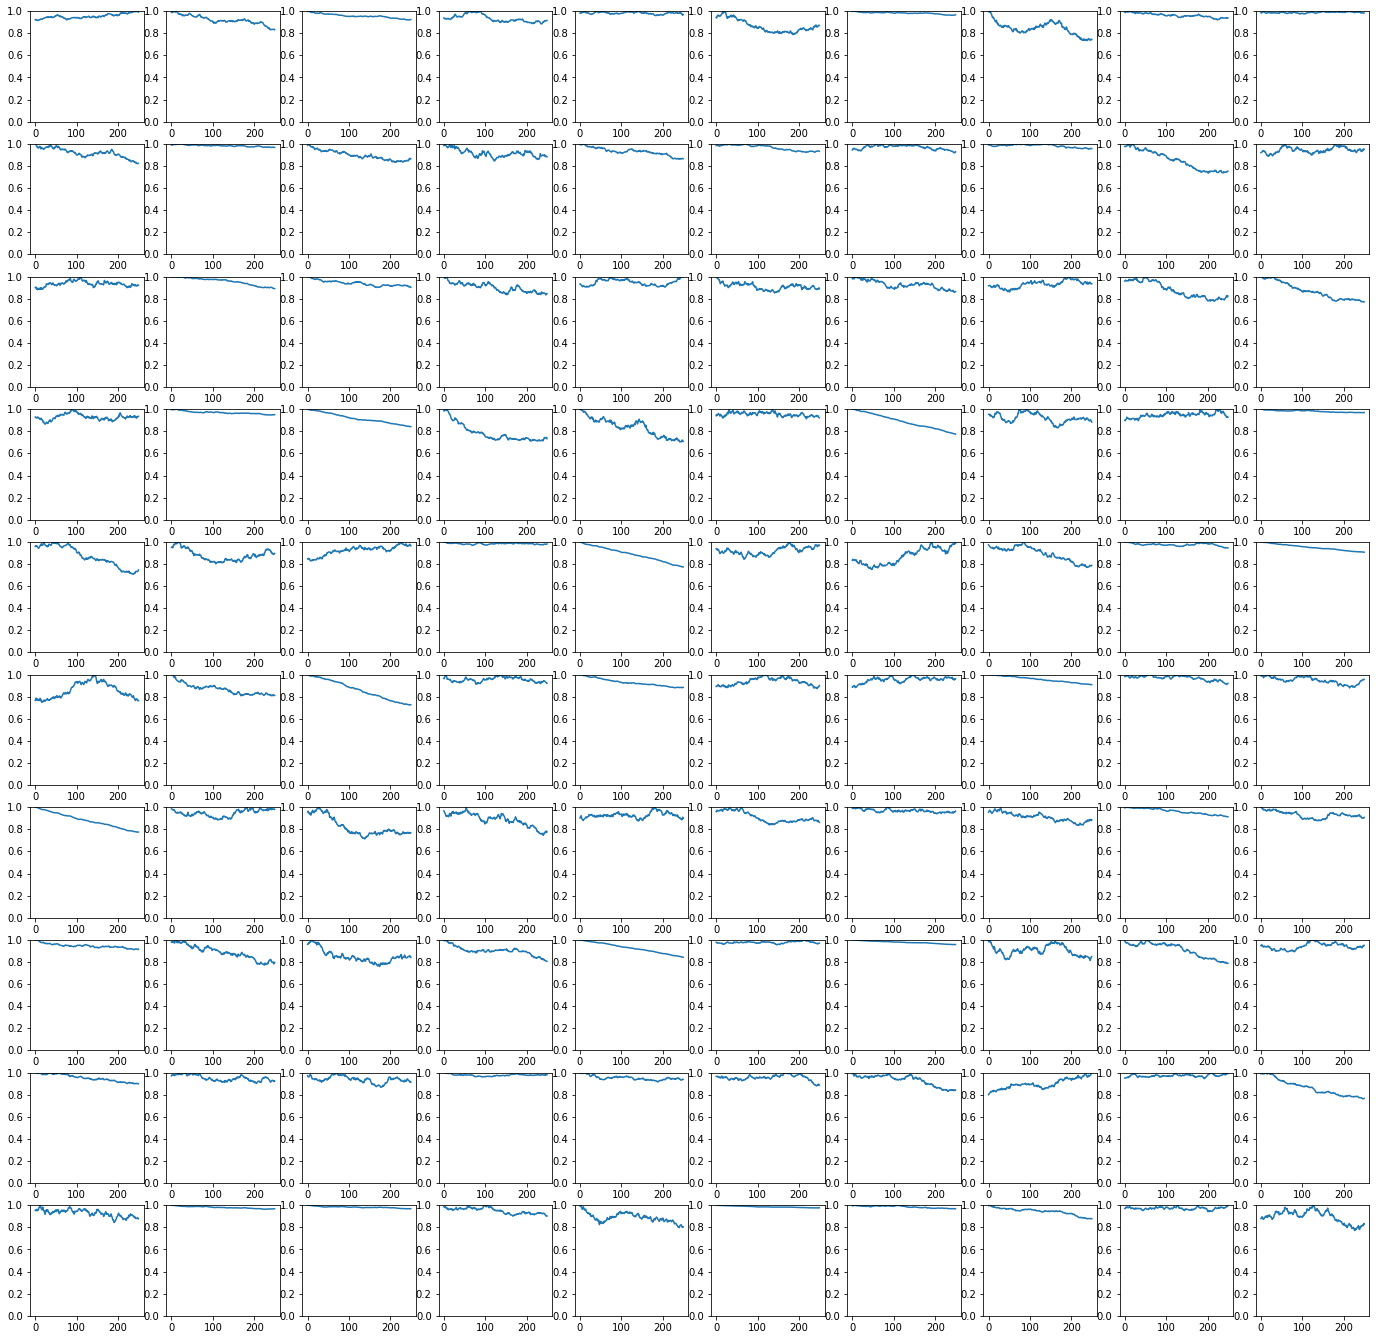

In [63]:
# Scale data from 0 to 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_price = scaler.fit_transform(prices)

fig, axes = plt.subplots(10, 10, figsize=(24, 24))

for i in range(0, n_inst):
    ax = axes.ravel()[i]
    
    # ax.plot(prices[i])

    prices[i] /= np.max(prices[i])

    # prices[i] = scaler.fit_transform(prices[i])
    
    ax.plot(prices[i])
    ax.set_ylim(bottom=0, top=1)

plt.show()

fig.savefig("stocks_scaled.png")

[72 31 13 83 33  8 26 89 64 97 94 84 10 17 95 79 30 62 92 96 36 28  5 40
 58 78  6 71 15 87 25 34  1 69 76 52 51 91  4  7 32 46 27 57 41 63  0 65
 99 77]


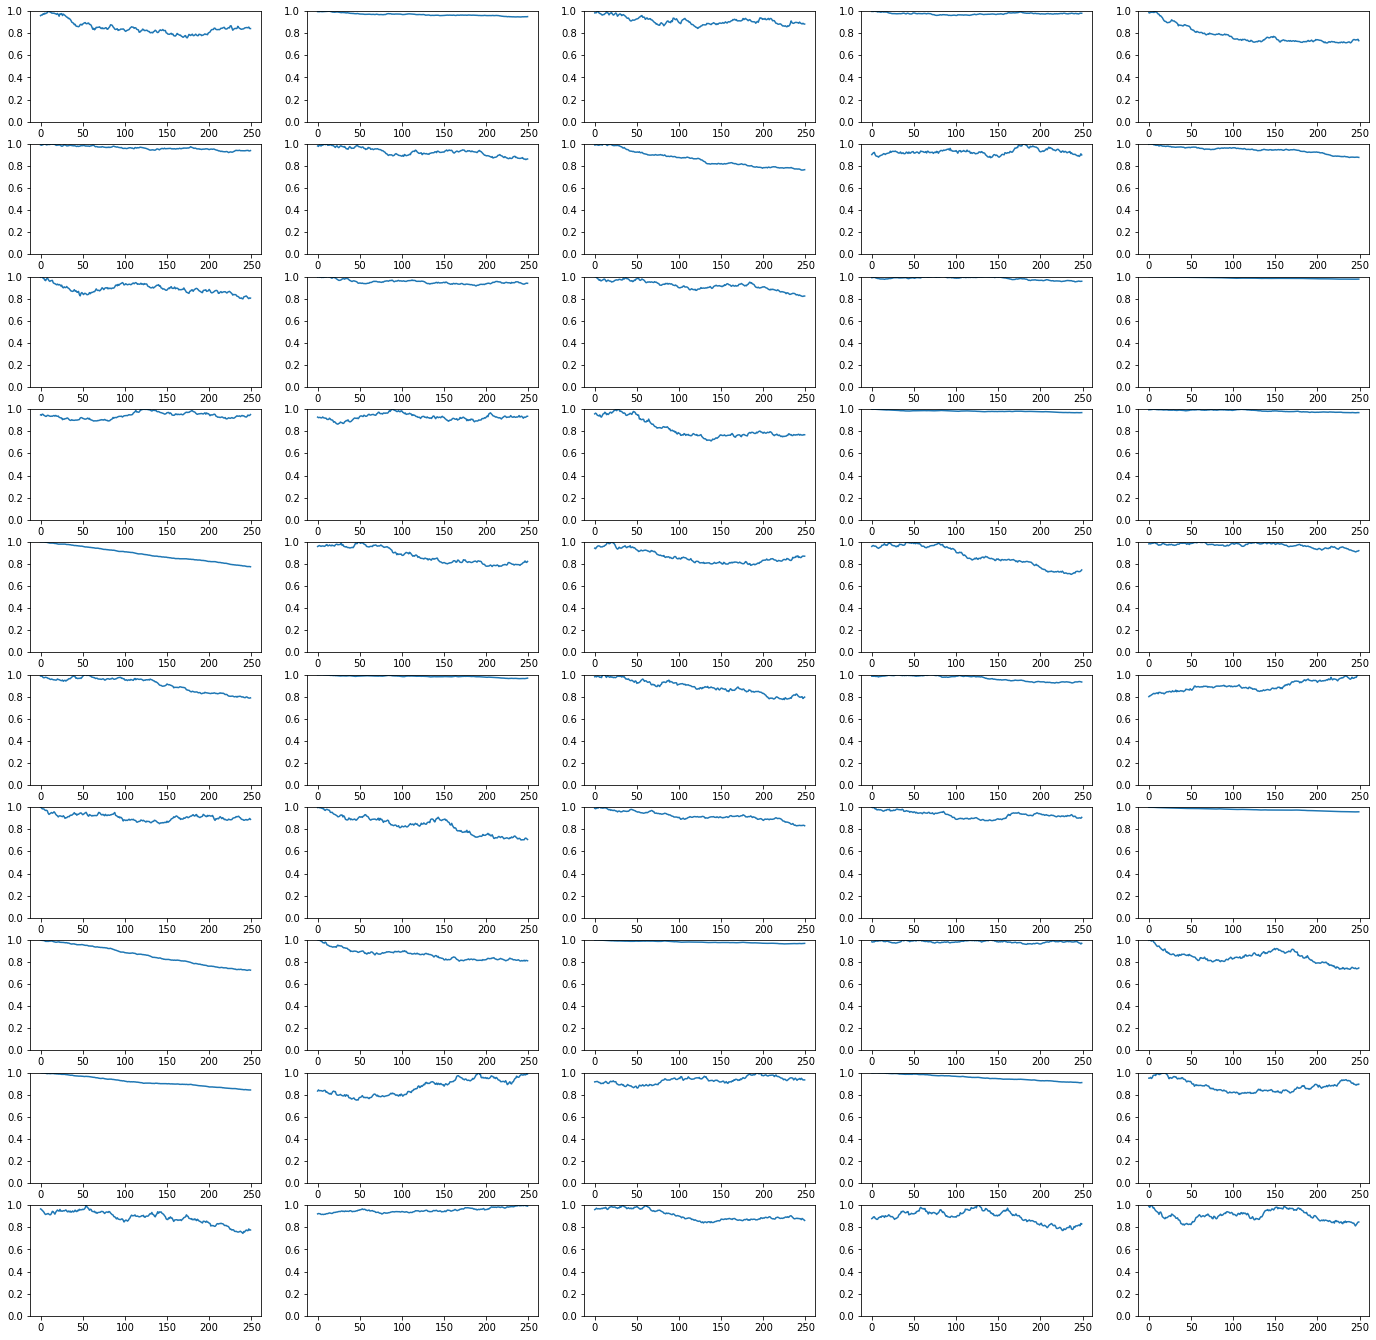

In [ ]:
# Training data

np.random.seed(69)

training_size = int(n_inst/2)
idx = np.random.choice(prices.shape[0], training_size, replace=False)

training_data = prices[idx, :]
print(idx)

fig, axes = plt.subplots(10, 5, figsize=(24, 24))

for i in range(0, training_size):
    ax = axes.ravel()[i]
    
    ax.plot(training_data[i])
    ax.set_ylim(bottom=0, top=1)

plt.show()

fig.savefig("stocks_scaled.png")

(60, 1)
[[0.92181445 0.9250057  0.92363802 ... 0.95691817 0.95577844 0.95121951]
 [0.9250057  0.92363802 0.92249829 ... 0.95577844 0.95121951 0.95372692]
 [0.92363802 0.92249829 0.91702758 ... 0.95121951 0.95372692 0.95669022]
 ...
 [0.96170504 0.96421245 0.95737406 ... 0.99589697 0.99840438 1.        ]
 [0.96421245 0.95737406 0.96010941 ... 0.99840438 1.         0.99521313]
 [0.95737406 0.96010941 0.96307271 ... 1.         0.99521313 0.9940734 ]] (190, 60, 1)
60 1
[0.95372692 0.95669022 0.94780032 0.94894005 0.94962389 0.95144746
 0.94552086 0.94506496 0.94232961 0.93503533 0.93594712 0.93731479
 0.9368589  0.93002052 0.92774105 0.927969   0.92090267 0.92272624
 0.92888078 0.93275587 0.93116025 0.92751311 0.92979257 0.92888078
 0.93275587 0.93252792 0.93503533 0.93868247 0.93936631 0.94187372
 0.94073399 0.93936631 0.94210166 0.94141783 0.94301345 0.94118988
 0.94141783 0.94187372 0.93845452 0.94005015 0.94369729 0.94118988
 0.94005015 0.93754274 0.93822658 0.94141783 0.93913836 0.935

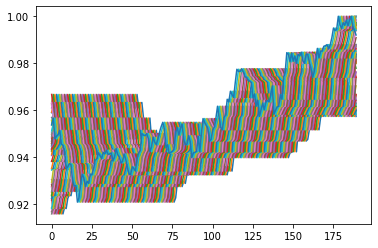

In [68]:
#def create_dataset(data, look_back=1):


train_x = []
train_y = []

inst_1 = prices[0]

for i in range(60, len(inst_1)):
    train_x.append(inst_1[i-60: i])
    train_y.append(inst_1[i])

train_x = np.array(train_x)
train_y = np.array(train_y)

plt.plot(train_x)
plt.plot(train_y)

print((train_x.shape[1], 1))

print(train_x, (train_x.shape[0], train_x.shape[1], 1))

print(train_x.shape[1], 1)

print(train_y)

In [71]:
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

train_x = []
train_y = []

len_validate = 50
len_train = 60

# train the model with the first 200 days
for i in range(len_train, len(inst_1)-len_validate):
    train_x.append(inst_1[i-len_train: i])
    train_y.append(inst_1[i])

train_x = np.array(train_x)
train_y = np.array(train_y)

train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(train_x.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adadelta')
lstm_model.fit(train_x, train_y, epochs=3, batch_size=1, verbose=2)

# predict future stock prices
past_price = inst_1[len(inst_1) - (len_validate) - 1 - len_train:]
past_price = past_price.reshape(-1, 1)

test_result = []

for i in range(len_train, past_price.shape[0]):
    test_result.append(past_price[i-60:i, 0])

test_result = np.array(test_result)
# test_result.reshape(test_result, (test_result.shape[0], test_result.shape[1],1))

model_prediction = lstm_model.predict(test_result)
print(model_prediction)

Epoch 1/3
140/140 - 4s - loss: 1.0498 - 4s/epoch - 26ms/step
Epoch 2/3
140/140 - 2s - loss: 1.0090 - 2s/epoch - 12ms/step
Epoch 3/3
140/140 - 2s - loss: 0.9646 - 2s/epoch - 12ms/step
2/2 [==============================] - 1s 8ms/step
[[-0.02170319]
 [-0.02168866]
 [-0.02167284]
 [-0.02165888]
 [-0.0216612 ]
 [-0.02166769]
 [-0.02170102]
 [-0.02175387]
 [-0.02183604]
 [-0.02192669]
 [-0.02200423]
 [-0.02207653]
 [-0.02213103]
 [-0.02217657]
 [-0.0222053 ]
 [-0.02223267]
 [-0.02225654]
 [-0.02228107]
 [-0.02229458]
 [-0.02229716]
 [-0.02230434]
 [-0.02231497]
 [-0.02231748]
 [-0.02230772]
 [-0.02228111]
 [-0.02225336]
 [-0.02224293]
 [-0.02225782]
 [-0.02227514]
 [-0.02229896]
 [-0.02232487]
 [-0.02235501]
 [-0.02238585]
 [-0.02241559]
 [-0.02243705]
 [-0.02245666]
 [-0.02248229]
 [-0.02252108]
 [-0.02256165]
 [-0.02260099]
 [-0.02265138]
 [-0.02269481]
 [-0.02272529]
 [-0.0227525 ]
 [-0.02277344]
 [-0.02279537]
 [-0.02280994]
 [-0.02282568]
 [-0.022846  ]
 [-0.02285465]
 [-0.02285184]]


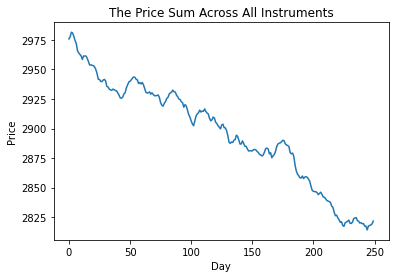

In [ ]:

price_sum = prices.sum(axis=0)
plt.plot(price_sum)
plt.title("The Price Sum Across All Instruments")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()